這個是我在網上找到覺得很適合用於入門的教學

# 客戶流失分析
# 使用以下工具：
- COLAB
- NGROK
- MLFLOW
- PYCARET

# 收集資料後，我們開始探索性資料分析、資料處理、模型訓練、模型評估並最終保存最佳模型的過程。
# 最後，我們需要保存最相關的特徵、使用的參數、分析中產生的圖表以及整個過程中產生的其他文件。
# Mlflow可以幫你記錄整個過程。
# Mlflow 可以在公司環境內的伺服器上的定義連接埠上運作。
# 在此範例中，分析是在 Colab 中完成的，mlflow 在連接埠 5000 上運行，透過 ngrok 存取。
# Pycaret 用於處理、訓練和選擇最佳模型。

In [1]:
!pip install --q pycaret mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 630.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 9.1 MB/s eta 0:00:00


In [2]:
!pip install pyngrok

In [3]:
# 預處理
from sklearn.preprocessing import StandardScaler

import pandas as pd

# 模型創建
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#指標
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import mlflow

from pyngrok import ngrok

In [6]:
from pycaret.classification import *

In [7]:
pd.set_option("display.precision", 3)

In [8]:
def metricas(y_test, y_predict):
    acuracia = round(accuracy_score(y_test, y_predict),3)
    precision = round(precision_score(y_test, y_predict,average='weighted'),3)
    recall = round(recall_score(y_test, y_predict,average='weighted'),3)
    f1 = round(f1_score(y_test, y_predict,average='weighted'),3)
    return acuracia, precision, recall, f1


In [9]:
def matriz_confusao(y_test, y_predict):
    matriz_conf = confusion_matrix(y_test.values.ravel(), y_predict)
    fig = plt.figure()
    ax = plt.subplot()
    sns.heatmap(matriz_conf, annot=True, cmap='Blues', ax=ax);

    ax.set_xlabel('Valor Predito');
    ax.set_ylabel('Valor Real');
    ax.set_title('Matriz de Confusão');
    ax.xaxis.set_ticklabels(['Classe 1', 'Classe 2']);
    ax.yaxis.set_ticklabels(['Classe 1', 'Classe 2']);
    plt.show()
    plt.close()
    return fig

In [10]:
data = pd.read_csv("https://raw.githubusercontent.com/ckliu1402/example_data/main/Churn_Modelling.csv")
data


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
# Define columns and target

exclude_columns = ['RowNumber', 'CustomerId', 'Surname']
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
target = 'Exited'

# Pycaret

In [12]:
experiment = setup(data = data,
                   ignore_features = exclude_columns,
                   numeric_features = numerical_columns,
                   categorical_features = categorical_columns,
                   target = target,
                   log_experiment = True,
                   log_plots = True,
                   experiment_name = 'mlflow_experiment'
                   )

,Description,Value
0,Session id,1022
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(10000, 14)"
4,Transformed data shape,"(10000, 13)"
5,Transformed train set shape,"(7000, 13)"
6,Transformed test set shape,"(3000, 13)"
7,Ignore features,3
8,Numeric features,6
9,Categorical features,4


2024/09/05 12:21:58 INFO mlflow.tracking.fluent: Experiment with name 'mlflow_experiment' does not exist. Creating a new experiment.


In [13]:
## Model Selection and Optimization
model = compare_models(n_select = 1, include = ['gbc', 'rf'])
tuned_model = tune_model(model)

## Finalize model
finalized_model = finalize_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8661,0.8648,0.4754,0.7837,0.5909,0.5166,0.5402,3.0840
rf,Random Forest Classifier,0.8611,0.8491,0.4593,0.7671,0.5737,0.4970,0.5208,1.3860


Processing:   0%|          | 0/13 [00:00<?, ?it/s]

2024/09/05 12:22:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/09/05 12:22:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8529,0.8450,0.4406,0.7326,0.5502,0.4687,0.4904
1,0.8729,0.8737,0.5035,0.8000,0.6180,0.5464,0.5675
2,0.8600,0.8822,0.5105,0.7228,0.5984,0.5166,0.5281
3,0.8614,0.8662,0.4406,0.7875,0.5650,0.4903,0.5196
4,0.8729,0.8606,0.5245,0.7812,0.6276,0.5545,0.5705
5,0.8629,0.8427,0.4476,0.7901,0.5714,0.4971,0.5256
6,0.8543,0.8866,0.4789,0.7083,0.5714,0.4876,0.5011
7,0.8600,0.8711,0.4859,0.7340,0.5847,0.5047,0.5202
8,0.8686,0.8679,0.4859,0.7841,0.6000,0.5265,0.5481


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


2024/09/05 12:24:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/09/05 12:24:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [14]:
print(finalized_model)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['CreditScore', 'Age', 'Tenure',
                                             'Balance', 'NumOfProducts',
                                             'EstimatedSalary'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 Transforme...
                                            criterion='friedman_mse', init=None,
                  

In [15]:
# run mlflow server (tracking UI) in the background
get_ipython().system_raw("mlflow ui --port 5000 &")

# Ngrok

In [16]:
ngrok.kill()

# * 注意 *
# 建立您的帳戶並取得下一步所需的TOKEN。
https://dashboard.ngrok.com/get-started/your-authtoken



In [19]:
# Terminate ngrok port
#ngrok.kill()
# Set authentication (optional)
# Get your authentication token via https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "請貼上你的TOKEN"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

In [20]:
# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://f4d0-35-245-107-102.ngrok-free.app


In [21]:
tags = {
        "Projeto": "Tutorial MLflow",
        "team": "Data Science",
        "dataset": "Churn"
       }

In [22]:
mlflow.end_run()

Acurácia: 0.864
Precision: 0.854
recall: 0.864
f1: 0.848


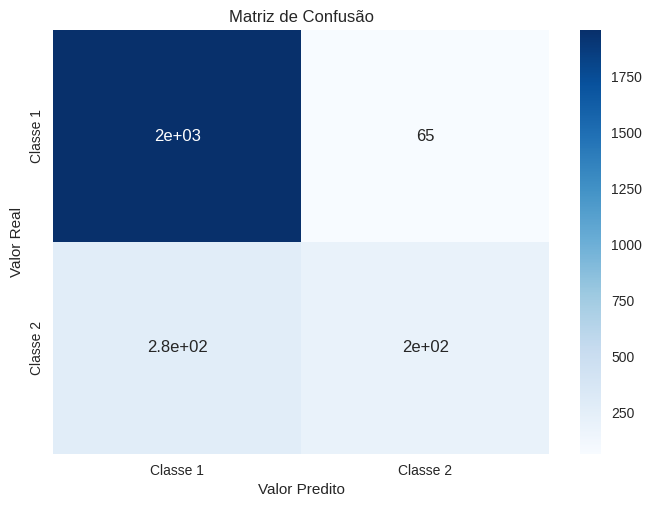

In [23]:
 # Carregando os dados
df = data.copy()
df.drop(exclude_columns, axis=1, inplace=True)
# Separação dos dados entre treino e teste
train, test = train_test_split(df)
x_train = train.drop(columns=['Exited'])
x_test = test.drop(columns=['Exited'])
y_train = train["Exited"]
y_test = test["Exited"]
clf = finalized_model
mlflow.end_run()
# Inicializando a criação de um novo experimento
with mlflow.start_run(run_name='ChurnClassifier'):
    #Criação do modelo
    clf.fit(x_train, y_train)
    #Load model to tracking server

    #Predição dos valores de testes
    pred = clf.predict(x_test)
    #Métricas
    acuracia, precision, recall, f1 = metricas(y_test, pred)
    print("Acurácia: {}\nPrecision: {}\nrecall: {}\nf1: {}".format(acuracia, precision, recall, f1))
    #Matriz de confusão
    matriz_conf = matriz_confusao(y_test, pred)
    temp_name = "confusion-matrix.png"

    matriz_conf.savefig(temp_name)
    mlflow.log_artifact(temp_name, "confusion-matrix-plots")
    mlflow.set_tags(tags)
    mlflow.log_param('Features', df.columns)
    mlflow.log_metric('accuracy', acuracia)
    mlflow.log_metric('precision', precision)
    mlflow.log_metric('recall', recall)
    mlflow.log_metric('f1', f1)
mlflow.end_run()

# 透過 ngrok 存取 Mlflow 頁面。
# 您可改參數並跑些測試並透過 mlflow.log 記錄它們，
# 最後你可從中找到的最佳模型。
# Mlflow 有許多選項，從資料預處理到超參數等。